In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("../input/diabetescsv/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
x = df.drop("Outcome",axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [3]:
y = df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split(x,y, train_size=0.5, test_size=0.5, random_state=0)
test_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
185,7,194,68,28,0,35.9,0.745,41
523,9,130,70,0,0,34.2,0.652,45
353,1,90,62,12,43,27.2,0.580,24
460,9,120,72,22,56,20.8,0.733,48


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [6]:
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegression
ml = LogisticRegression(random_state =0)
ml.fit(train_X,train_y)

LogisticRegression(random_state=0)

In [7]:
y_pred = ml.predict( test_X)
print(y_pred )

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 0 0 1]


Text(0.5, 1.0, 'Actual vs predicted')

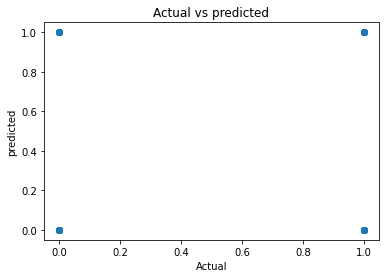

In [8]:
plt.scatter(test_y,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred ,test_y)

0.7890625

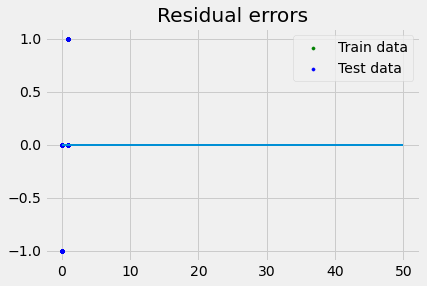

In [10]:
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(ml.predict(train_X), ml.predict(train_X) - train_y,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(ml.predict(test_X), ml.predict(test_X) - test_y,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()